ML: is a set of tools and techniques which allow to find patterns in data

- We can do Deep learning with Convolutional Neural Network (CNN)
- CNN is a DL algorithm that work better for image classification due to the ability to learn automatically features from images in a hierachical fashion (i.e each layer builds upon what was learned by the previous layer)
- Image classification is a fundamental taks in computer vision
- Many practical applications of image classification are:
    1. Object Recognition: identifying objects within images, such as cars, animals, or household items
    2. Medical Imaging: diagnosing diseases from medical images like X-rays or MRIs
    3. Quality Control: inspecting products for defects on manufacturing lines
    4. Autonomous Vehicles: identifying pedestrians, traffic signs, and other vehichles in self-driving cars
    5. Security and Surveillance: detecting anomalies or unauthorised objects in security footage



### Deep learning workflow
**step1: Outline the problem**
    - example: image classification so the aim is to put an image into one of a few categories.
    - We can use CIFAR-10 dataset and have 10 categories: airplane, automobile, bird,cat, deer, dog, frog, horse, ship, truck
    
**step2: Identify inputs and outputs**
    - example: the data is images and the inputs could be the individual pixels of the images
    - the output will be one for each potential class
**step3: Prepare data **
    - neural networks only deal with numerical data, hence non-numerical data (e.g., images) will need to be converted to numerical data
    - normalize the imae pixel values to be between 0 and 1
    - one-hot encode the training image labels
    - divide the data into training, validation and test subsets
    
**step4: Choose a pre-trained model or build a new architecture from scratch**
    - design the model from scratch, we need to think about how many input neurons to use, how many hidden layers and how many outputs, and what types of layers to use.
    
**step5: Choose a loss function and optimizer and compile the model**
    - compile the model is how to set up the rules and strategies for how the network is going to learn
    - loss function: tells the training algorithm how far away the predicted value was from the true value
    - optimizer: is used for taking the output of the loss function and then applying some changes to the weights within the network. It is through this process that 'learning' (adjustment of the weights) is achieved
    
**step6: Train the model**
    - training the model for a given number of iterations (epochs) through the training dataset or until the loss function gives a value under a certain threshold
    
**step7: Perform a prediction/classification**
    - after training the network, we use it to perform prediction on a special hold-out set
    - make sure the data used to test are prepared the same way as the training data
    
**step8: Measure performance**
    - using the test dataset to find our well the model performs.
    
**step9: Tune Hyperparameters**
    - when using libraries like TensorFlow or Keras, the process also is selecting the best values for various hyperparameters that govern the training process.
    - Hyperparameters: are all the parameters set by the person configuring the model as opposed to those learned by the algorithm itself. Includes: learning rate, number of layers in the network, number of neurons per layer, etc.
    - Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters that will optimise the model's performance.
    
**step10: Share the model**
    - if our model is from scratch, we can allow others to use it as a pre-trained network and for them to reproduce our result
    - we must save the model in order to share it

In [1]:
# load needed packages
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
# function to prepare the training dataset
def prepare_dataset(train_images, train_labels):

    # normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0

    # one-hot encode the training labels
    train_labels = keras.utils.to_categorical(train_labels, len(class_names))

    # split the training data into train and validation set
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=42
    )

    return train_images, val_images, train_labels, val_labels


In [28]:
# load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# create a list of class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#### step 3, prepare the data
# prepare the dataset for training
train_images, val_images, train_labels, val_labels = prepare_dataset(train_images, train_labels)

In [4]:
print('Train: Images=%s, Labels=%s' % (train_images.shape, train_labels.shape))
print('Validate: Images=%s, Labels=%s' % (val_images.shape, val_labels.shape))
print('Test: Images=%s, Labels=%s' % (test_images.shape, test_labels.shape))

Train: Images=(40000, 32, 32, 3), Labels=(40000, 10)
Validate: Images=(10000, 32, 32, 3), Labels=(10000, 10)
Test: Images=(10000, 32, 32, 3), Labels=(10000, 1)


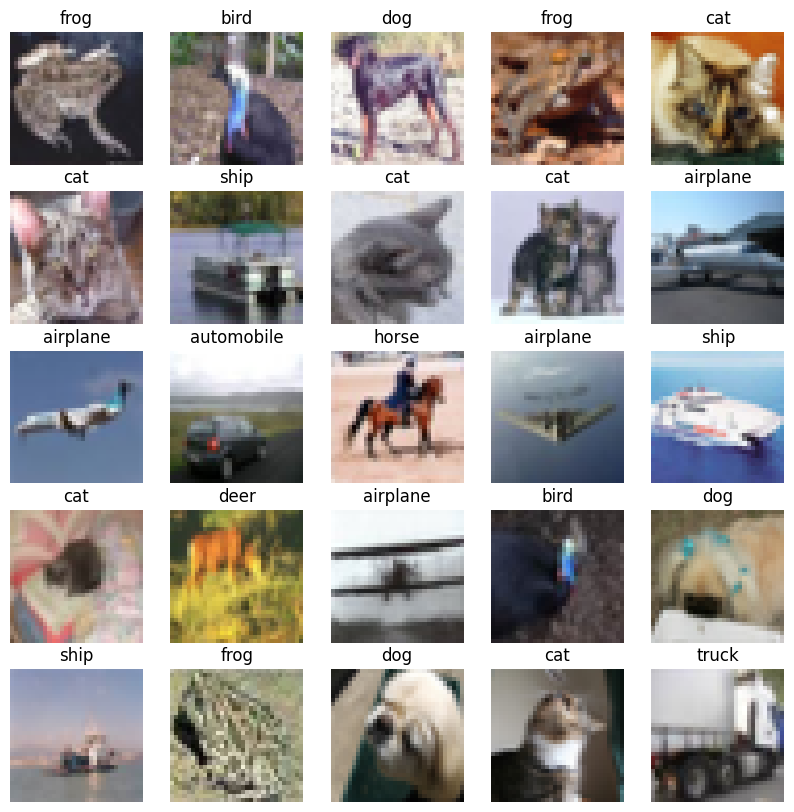

In [91]:
# visualize a subset of the CIFAR-10 dataset
# set up plot region
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))

# add images to plot
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.axis('off')
    ax.set_title(class_names[train_labels[i,].argmax()])

# view plot
plt.show()

In [6]:
train_images.shape[1:]

(32, 32, 3)

In [7]:
# define the model
def create_model_intro():

    # CNN Part1
    # input layer of 32x32 images with three channels (RGB)
    inputs_intro = keras.Input(shape=train_images.shape[1:])

    # CNN Part2
    # conv layer with 16 filters, 3x3 kernel size, ReLU activation
    x_intro = keras.layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu')(inputs_intro)
    # pooling layer with input window size 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # second conv layer with 32 filters, 3x3 kernel size, ReLU activation
    x_intro = keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu')(x_intro)
    # second pooling layer with input window sized 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # Flatten layer to convert 2D feature maps into a 1D vector
    x_intro = keras.layers.Flatten()(x_intro)
    # Dense layer with 64 neurons and ReLU activation
    x_intro = keras.layers.Dense(units=64, activation='relu')(x_intro)

    # CNN Part3
    # output layer with 10 units (one for each class) and softmax activation
    outputs_intro = keras.layers.Dense(units=10, activation='softmax')(x_intro)

    # create the model
    model_intro = keras.Model(inputs=inputs_intro,
                              outputs=outputs_intro,
                             name='cifar_model_intro')
    return model_intro

In [8]:
# create the introduction model
model_intro = create_model_intro()

# view model summary
model_intro.summary()

Model: "cifar_model_intro"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,530 (310.66 KB)

 Trainable params: 79,530 (310.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile the model
model_intro.compile(optimizer=keras.optimizers.Adam(),
                   loss=keras.losses.CategoricalCrossentropy(),
                   metrics=[keras.metrics.CategoricalAccuracy()])

In [10]:
# fit the model
history_intro = model_intro.fit(x=train_images, y=train_labels,
                               batch_size=32, epochs=10,
                               validation_data=(val_images,val_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - categorical_accuracy: 0.3605 - loss: 1.7748 - val_categorical_accuracy: 0.5357 - val_loss: 1.3279
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5587 - loss: 1.2589 - val_categorical_accuracy: 0.5596 - val_loss: 1.2331
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5994 - loss: 1.1473 - val_categorical_accuracy: 0.6087 - val_loss: 1.1033
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.6348 - loss: 1.0383 - val_categorical_accuracy: 0.6213 - val_loss: 1.0688
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6572 - loss: 0.9784 - val_categorical_accuracy: 0.6356 - val_loss: 1.0313
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.6832 - loss: 0.9045 - val_categorical_accuracy: 0.6426 - val_loss: 1.0241
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy

- epoch: describes the number of full passes over all training data
    - there are 1250 batches (steps) to complete each epoch
    - calculated from the number of images as input/batch size (40000/32)
- loss: the model try to minimise this value, an error between the true label of an image and the model prediction.
    - minimising this distance is where *learning* occurs to adjust weights and bias which reduce loss
- val_loss: a value calculated against the validation data and is a measure of the model's performance against unseen data
    - both values are a summation of errors made during each epoch
- accuracy and val_accuracy values are a percentage and are only relevant to classification problems
    - val_accuracy score: used to communicate a model's effectiveness on unseen data

In [11]:
# perform a prediction
# normalize test dataset RGB values to be between 0 and 1
test_images = test_images / 255.0

# make prediction for the first test image
result_intro = model_intro.predict(test_images[0].reshape(1,32,32,3))
print(result_intro)

# extract class with highest probability
print(class_names[result_intro.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
[[1.1742507e-03 7.8047859e-04 3.8873104e-03 9.6599579e-01 2.1094428e-03
  6.3176937e-03 1.4092010e-02 3.1049585e-05 5.3575048e-03 2.5440840e-04]]
cat


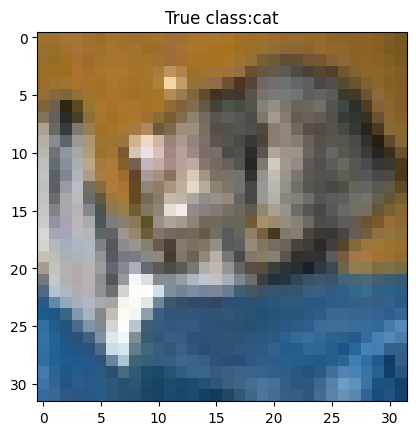

In [12]:
# plot the first test image with its real label

# create a plot
plt.figure()

# display image
plt.imshow(test_images[0])
plt.title('True class:' + class_names[result_intro.argmax()])

# view plot
plt.show()

- Training the model for more epochs (longer time) and using a deeper model (more layers) helps it learn better and give more accurate predictions
- The model learned well and its performance doesn't change much with more training, we say it has *converged*
- **Convergence** refers to the point where the model has reached an optimal or near-optimal state in terms of learning from the training data
- getting a different answer if you run the model again. Although the neural network itself is deterministic (ie without randomness), vairous factors in the training process, system setup, and hardware configurations can lead to small variations in the output
- Improving the accuracy of the model can be done by adding or removing layers and fine-tuning the hyperparameters

In [ ]:
# save the model
model_intro.save('fit_outputs/model_intro.keras')

#### Data preprocessing
Various tasks to enhance the quality and consistency of the data:
    
- **Resizing**: resize images to a consistent resolution to ensure uniformity and reduce computational load
- **Augmentation**: apply random transformations (e.g. rotations, shifts, flips) to create new variations of the same image. Improve the robustness and generalisation of the model by exposing to more diverse data
- **Normalization**: scale pixel value to a common range, often between 0 and 1 or -1 and 1. It helps the model to converge faster during training
- **Label encoding**: approach used to represent categorical data with numerical labels
- **Data splitting**: split the data set into seprate parts to have one for training, for evaluating during training, and one reserved for the final evaluation of the model's performance


**Pixels**
- images in a computer are stored as rectangular arrays of hundreds, thousands or millions of discrete 'picture elements' known as pixels
- Each pixel can be thought as a single square point of coloured light
- in Python, an image can be represented as a 2- or 3-dimensional array
- **Array** is used to store multiple values or elements of the same datatype in a single variable
- In the context of images, arrays have dimensions for height, width, and colour channels (if applicable) and each element corresponds to a pixel value in the image

In [14]:
# specify the image path
new_img_path = 'data/Jabiru_TGS.JPG'

# read in the image with default arguments
new_img_pil = keras.utils.load_img(path=new_img_path)

# check the image class and size
print('Image class:', new_img_pil.__class__)
print('Image size:', new_img_pil.size)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Jabiru_TGS.JPG'

In [13]:
# read in the image and specify the target size
new_img_pil_small = keras.utils.load_img(path=new_img_path, target_size=(32,32))

# confirm the image class and size
print('Resized image class :', new_img_pil_small.__class__)
print('Resized image size', new_img_pil_small.size)

NameError: name 'new_img_path' is not defined

Image augmentation
- several ways used to augment data to increase the diversity of the training data and improve model robustness
- Geometric transformations: rotation, scaling, zooming, cropping
- Flipping or mirroring: some classes, like horse, have a different shape when facing left or right and we want our model to recognize both
- Colour properties: brightness, contrast, or hue. This changes simulate variations in lighting conditions

Normalization
- Image RGB values are between 0 and 255. As input for neural networks, it is better to have small input values.
- The process of converting the RGB values to be between 0 an 1 is called **normalization**
- the image need to be in numpy array before applying normalization


In [ ]:
# first convert the image into an array for normalization
new_img_arr = keras.utils.img_to_array(new_img_pil_small)

# confirm the image class and shape
print('Converted image class  :', new_img_arr.__class__)
print('Converted image shape', new_img_arr.shape)

Converted image class  : <class 'numpy.ndarray'>
Converted image shape (32, 32, 3)


In [ ]:
# inspect pixel values before and after normalization

# extract the min, max and mean pixel values BEFORE
print('BEFORE normalization')
print('Min pixel value ', new_img_arr.min())
print('Max pixel value ', new_img_arr.max())
print('Mean pixel value ', new_img_arr.mean().round())

# normalize the RGB values to be between 0 and 1
new_img_arr_norm = new_img_arr / 255.0

# extract the min, max and mean pixel values AFTER
print('AFTER normalization')
print('Min pixel value ', new_img_arr_norm.min())
print('Max pixel value ', new_img_arr_norm.max())
print('Mean pixel value ', new_img_arr_norm.mean().round())

BEFORE normalization
Min pixel value  0.0
Max pixel value  255.0
Mean pixel value  87.0
AFTER normalization
Min pixel value  0.0
Max pixel value  1.0
Mean pixel value  0.0


One-hot encoding
- is a technique to represent categorical data as binary vectors, making compatible with ML algorithms
- keras.utils.to_categorical(y, num_classes=None, dtype='float32')
    - y: is an array of class values to be converted into a matrix
    - num_classes: is the total number of classes. If None, this would be inferred as max(y)+1
    - dtype: is the data type expected by the input. Default: 'float32'

Splitting data
- sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
- first two parameters are the dataset (X) and the corresponding targets (y)
- test_size: is the fraction of the dataset used for testing
- random_state: controls the shuffling of the dataset, setting this value will reproduce the same results every time it is called
- shuffle: controls whether the order of the rows of the dataset is shuffled before splitting and can be either True or False
- stratify: controls how the split is done

Pre-existing image data
- MNIST dataset: 60,000 training images of handwritten digits (0-9)
- ImageNet: 14 million hand-annotated images indicating objects from more than 20,000 categories.
- MS COCO: more than 200,000 labelled images used for object detection, instance segmentation, keypoint analysis and captioning

In [67]:
# function to prepare the training dataset
def prepare_dataset(train_images, train_labels):

    # normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0

    # one-hot encode the training labels
    train_labels = keras.utils.to_categorical(train_labels, len(class_names))

    # split the training data into training and validation set
    train_images, val_images, train_labels, val_labels = train_test_split(train_images,train_labels,test_size=0.2,random_state=42)

    return train_images,val_images,train_labels,val_labels

In [68]:
# load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# create a list of class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [69]:
# inspect the labels before and after data preparation
# to visualize one-hot encoding
print()
print('train_labels before one hot encoding')
print(train_labels)


train_labels before one hot encoding
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [70]:
#### step 3, prepare the data
# prepare the dataset for training
train_images, val_images, train_labels, val_labels = prepare_dataset(train_images, train_labels)

print()
print('train_labels after one hot encoding')
print(train_labels)


train_labels after one hot encoding
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [5]:
print('Number of training set images', train_images.shape[0])

# find the number of samples in each class
print('Number of images in each class:\n', train_labels.sum(axis=0))

Number of training set images 40000
Number of images in each class:
 [4027. 4021. 3970. 3977. 4067. 3985. 4004. 4006. 3983. 3960.]


In [6]:
train_images.shape[1:]

(32, 32, 3)

In [73]:
# a function with a dropout
def create_model_dropout():

  # CNN part 1
  # input layer 32x32 images with three channels (RGB)
  inputs_dropout = keras.Input(shape=train_images.shape[1:])

  # CNN part 2
  # convolutional layer with 16 filters, 3x3 kernel size, and ReLU
  x_dropout = keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu')(inputs_dropout)

  # pooling layer with input window sized 2x2
  x_dropuot = keras.layers.MaxPooling2D(pool_size=(2,2))(x_dropout)

  # second convolutional layer with 32 filters, 3x3 kernel size and ReLU
  x_dropout = keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu')(x_dropout)

  # second pooling layer with input window size 2x2
  x_dropout = keras.layers.MaxPooling2D(pool_size=(2,2))(x_dropout)

  # third convolutional layer with 64 filters, 3x3 kernel size and ReLU
  x_dropout = keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu')(x_dropout)

  # dropout layer randomly drops 50 per cent of the input units
  x_dropout = keras.layers.Dropout(rate=0.5)(x_dropout)

  # flatten layer to convert 2D feature maps into a 1D vector
  x_dropout = keras.layers.Flatten()(x_dropout)

  # CNN part 3
  # output layer with 10 units (one of each class) and softmax activation
  outputs_dropout = keras.layers.Dense(units=10, activation='softmax')(x_dropout)

  # create the model
  model_dropout = keras.Model(inputs=inputs_dropout,
                              outputs=outputs_dropout,
                              name='cifar_model_dropout')

  return model_dropout


In [74]:
# create the model dropout model
model_dropout = create_model_dropout()

# compile the model
model_dropout.compile(optimizer=keras.optimizers.Adam(),
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=[keras.metrics.CategoricalAccuracy()])

# fit the model
history_dropout = model_dropout.fit(x=train_images, y=train_labels,
                                    batch_size=32, epochs=10,
                                    validation_data = (val_images, val_labels))



Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.3776 - loss: 1.7094 - val_categorical_accuracy: 0.5751 - val_loss: 1.2190
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5782 - loss: 1.1954 - val_categorical_accuracy: 0.6431 - val_loss: 1.0288
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6427 - loss: 1.0192 - val_categorical_accuracy: 0.6742 - val_loss: 0.9338
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.6864 - loss: 0.9043 - val_categorical_accuracy: 0.6984 - val_loss: 0.8658
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.7051 - loss: 0.8499 - val_categorical_accuracy: 0.6967 - val_loss: 0.8655
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.7267 - loss: 0.7934 - val_categorical_accuracy: 0.7146 - val_loss: 0.8268
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy

In [10]:
# save dropout model
model_dropout.save('/content/model_dropout.keras')

NameError: name 'model_dropout' is not defined

313/313 - 1s - 2ms/step - categorical_accuracy: 0.7211 - loss: 0.7966


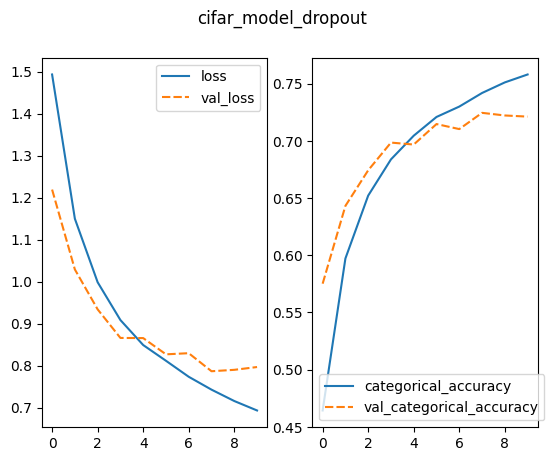

In [76]:
# inspect the training results

# convert the history to a dataframe for plotting
history_dropout_df = pd.DataFrame.from_dict(history_dropout.history)

# plot the loss and accuracy from the training process
fig, axes = plt.subplots(1,2)
fig.suptitle('cifar_model_dropout')
sns.lineplot(ax=axes[0], data=history_dropout_df[['loss', 'val_loss']])
sns.lineplot(ax=axes[1], data=history_dropout_df[['categorical_accuracy', 'val_categorical_accuracy']])

val_loss_dropout, val_acc_dropout = model_dropout.evaluate(val_images, val_labels, verbose=2)

In [77]:
# performing a prediction/classification
# we need to prepare the test set

# load the CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

# create a list if classnames
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# normalize the RGB values to be between 0 and 1
test_images = test_images / 255.0

# check test image dataset is loaded - images and labels
print('Test: Images=%s, Labels=%s', (test_images.shape, test_labels.shape))

Test: Images=%s, Labels=%s ((10000, 32, 32, 3), (10000, 1))


In [78]:
type(train_labels), type(test_labels)

(numpy.ndarray, numpy.ndarray)

In [79]:
# predict
# load preferred model
model_best = keras.models.load_model('/content/model_dropout.keras')
print('We are using', model_best.name)

# use preferred model to predict
predictions = model_best.predict(x=test_images)

print(predictions)

We are using cifar_model_dropout
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.00263220e-03 8.98553481e-05 7.77796842e-03 ... 2.65276263e-04
  7.43578468e-03 1.60600845e-04]
 [1.59028340e-02 2.82959998e-01 1.54843328e-05 ... 1.88392633e-07
  6.98193610e-01 2.91465363e-03]
 [2.33251542e-01 3.15085143e-01 8.09322391e-03 ... 5.41948061e-03
  4.21073735e-01 1.29855685e-02]
 ...
 [8.69380165e-05 1.93297965e-05 3.89202833e-02 ... 6.25249445e-02
  9.48347733e-05 2.82745350e-05]
 [2.89930850e-01 5.30167043e-01 1.47646628e-02 ... 3.00116953e-03
  1.75228377e-03 1.04418276e-02]
 [6.85715077e-06 5.17065419e-05 2.28424702e-04 ... 9.94113386e-01
  2.57226702e-07 2.34132955e-07]]


- But the model returns a vector of probabilities, one for each class.
- Identify the class with the highest probability, then select the most likely class name of the object
- Using numpy.argmax() to find the class with the highest probability in each row

In [13]:
# convert probability predictions to table using class names for column names
prediction_df = pd.DataFrame(data=predictions, columns=class_names)

# inspect
print(prediction_df.head())

# convert predictions to class labels
predicted_labels = np.argmax(a=predictions, axis=1)
print('\n',predicted_labels)

NameError: name 'predictions' is not defined

In [81]:
# measuring the performance of the model

# evaluate the model on the test dataset
test_acc = accuracy_score(y_true=test_labels, y_pred=predicted_labels)
print('Accuracy:', round(test_acc,2))

Accuracy: 0.73


In [17]:
# create a confusion matrix
conf_matrix = confusion_matrix(y_true=test_labels, y_pred=predicted_labels)
print(conf_matrix)

[[727  28  36  16  26  13  22   7  92  33]
 [ 32 816   3   6   7   9  21   2  45  59]
 [ 78   9 429  66 147 105 116  20  19  11]
 [ 25   9  54 429  99 234 104  19  14  13]
 [ 26   6  55  63 665  40  79  43  17   6]
 [ 13   6  38 142  78 628  51  38   4   2]
 [  6   4  31  47  61  23 810   5   6   7]
 [ 13   9  36  41 129 103  16 629   3  21]
 [ 82  29   6  27   8   9  10   1 809  19]
 [ 44 111   7  15  14  10  19  12  56 712]]


In [83]:
# convert confusion matrix to a pandas dataframe
confusion_df = pd.DataFrame(data=conf_matrix, index=class_names, columns=class_names)

# set the names of the x and y axis
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

<Axes: xlabel='Predicted Label', ylabel='True Label'>

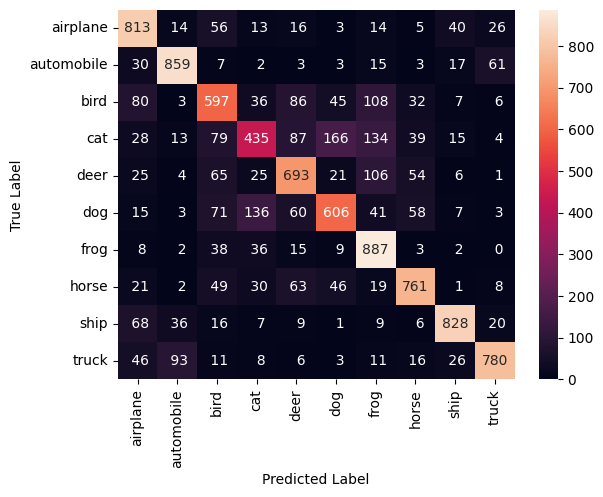

In [84]:
# use the heatmap function from seabord to visualize the confusion matrix
sns.heatmap(data=confusion_df, annot=True, fmt='3g')

In [7]:
# a new function with a varying dropout
def create_model_dropout_vary(dropout_rate):

  # CNN part 1
  # input layer 32x32 images with three channels (RGB)
  inputs_vary = keras.Input(shape=train_images.shape[1:])

  # CNN part 2
  # convolutional layer with 16 filters, 3x3 kernel size, and ReLU
  x_vary = keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu')(inputs_vary)

  # pooling layer with input window sized 2x2
  x_vary = keras.layers.MaxPooling2D(pool_size=(2,2))(x_vary)

  # second convolutional layer with 32 filters, 3x3 kernel size and ReLU
  x_vary = keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu')(x_vary)

  # second pooling layer with input window size 2x2
  x_vary = keras.layers.MaxPooling2D(pool_size=(2,2))(x_vary)

  # third convolutional layer with 64 filters, 3x3 kernel size and ReLU
  x_vary = keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu')(x_vary)

  # dropout layer randomly drops 50 per cent of the input units
  x_vary = keras.layers.Dropout(rate=dropout_rate)(x_vary)

  # flatten layer to convert 2D feature maps into a 1D vector
  x_vary = keras.layers.Flatten()(x_vary)

  # CNN part 3
  # output layer with 10 units (one of each class) and softmax activation
  outputs_vary = keras.layers.Dense(units=10, activation='softmax')(x_vary)

  # create the model
  model_vary = keras.Model(inputs=inputs_vary,
                              outputs=outputs_vary,
                              name='cifar_model_dropout_vary')

  return model_vary



In [8]:
train_labels.shape, val_labels.shape

((40000, 10), (10000, 10))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.3122 - loss: 1.8535 - val_categorical_accuracy: 0.5073 - val_loss: 1.3734
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.5174 - loss: 1.3524 - val_categorical_accuracy: 0.5589 - val_loss: 1.2283
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5825 - loss: 1.1820 - val_categorical_accuracy: 0.6088 - val_loss: 1.1052
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6118 - loss: 1.1021 - val_categorical_accuracy: 0.6154 - val_loss: 1.0994
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6392 - loss: 1.0355 - val_categorical_accuracy: 0.6473 - val_loss: 1.0119
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6619 - loss: 0.9739 - val_categorical_accuracy: 0.6483 - val_loss: 1.0110
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy

<Axes: xlabel='dropout_rate', ylabel='val_loss_vary'>

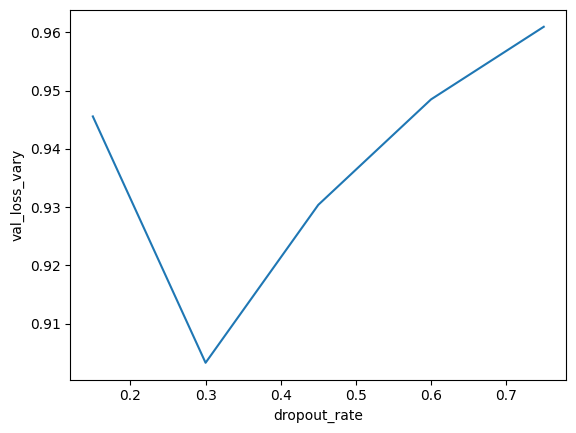

In [9]:

# specify the dropout rates range
dropout_rates = [0.15, 0.3, 0.45, 0.6, 0.75]

# create empty list to hold losses
val_losses_vary = []

# explore varying the dropout rates by for loop
for i in dropout_rates:

  # create the model
  model_vary = create_model_dropout_vary(i)

  # compile the model
  model_vary.compile(optimizer=keras.optimizers.Adam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])

  # fit the model
  model_vary.fit(x=train_images, y=train_labels,
                 batch_size=32, epochs=10,
                 validation_data=(val_images, val_labels))

  # evaluate the model on the test dataset
  val_loss_vary, val_acc_vary = model_vary.evaluate(val_images, val_labels)

  # save the evaluation metrics
  val_losses_vary.append(val_loss_vary)

# convert rates and metrics to dataframe for plotting
loss_df = pd.DataFrame({'dropout_rate':dropout_rates, 'val_loss_vary':val_losses_vary})

# plot the loss and accuracy from the training process
sns.lineplot(data=loss_df, x='dropout_rate', y='val_loss_vary')

In [31]:
# the best dropout rate is 0.3
# create the model
model_vary_final = create_model_dropout_vary(0.295)

# compile the model
model_vary_final.compile(optimizer=keras.optimizers.Adam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])

# fit the model
model_vary_final.fit(x=train_images, y=train_labels,
                 batch_size=32, epochs=30,
                 validation_data=(val_images, val_labels))

# save the model
model_vary_final.save('/content/model_vary_final.keras')


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.3027 - loss: 1.8874 - val_categorical_accuracy: 0.4878 - val_loss: 1.4265
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - categorical_accuracy: 0.5057 - loss: 1.3831 - val_categorical_accuracy: 0.5607 - val_loss: 1.2444
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.5647 - loss: 1.2326 - val_categorical_accuracy: 0.5797 - val_loss: 1.1904
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.5937 - loss: 1.1494 - val_categorical_accuracy: 0.6205 - val_loss: 1.0796
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.6167 - loss: 1.0967 - val_categorical_accuracy: 0.6427 - val_loss: 1.0217
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.6346 - loss: 1.0353 - val_categorical_accuracy: 0.6297 - val_loss: 1.0689
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy

In [32]:
# performing a prediction/classification
# we need to prepare the test set

# load the CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

# create a list if classnames
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# normalize the RGB values to be between 0 and 1
test_images = test_images / 255.0

# check test image dataset is loaded - images and labels
print('Test: Images=%s, Labels=%s', (test_images.shape, test_labels.shape))

Test: Images=%s, Labels=%s ((10000, 32, 32, 3), (10000, 1))


In [33]:
# predict
# load preferred model
model_best = keras.models.load_model('/content/model_vary_final.keras')
print('We are using', model_best.name)

# use preferred model to predict
predictions = model_best.predict(x=test_images)

# convert probability predictions to table using class names for column names
prediction_df = pd.DataFrame(data=predictions, columns=class_names)

# inspect
print(prediction_df.head())

# convert predictions to class labels
predicted_labels = np.argmax(a=predictions, axis=1)
print('\n',predicted_labels)

We are using cifar_model_dropout_vary
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
       airplane    automobile          bird           cat          deer  \
0  3.954333e-04  2.835856e-04  7.654125e-04  8.384502e-01  6.021977e-04   
1  7.833335e-04  1.779324e-02  9.856745e-08  1.615848e-08  3.394011e-09   
2  7.375209e-02  4.758395e-01  3.801956e-03  2.848212e-03  8.558880e-05   
3  8.453333e-01  8.856381e-03  1.976131e-02  3.695989e-03  1.276357e-03   
4  2.642787e-07  7.497962e-07  7.310703e-03  2.417862e-02  2.382906e-01   

            dog          frog         horse      ship         truck  
0  1.188645e-02  1.184359e-02  5.398819e-05  0.135411  3.078016e-04  
1  2.028364e-11  3.724188e-09  5.379637e-11  0.981216  2.077312e-04  
2  1.216489e-04  3.253744e-04  1.912007e-03  0.306797  1.345168e-01  
3  3.707031e-04  4.552169e-04  1.559305e-04  0.110739  9.356077e-03  
4  1.460625e-03  7.287492e-01  3.377360e-07  0.000009  2.407515e-07  

 [3 8 1 ... 5 1 7]


In [34]:
# measuring the performance of the model

# evaluate the model on the test dataset
test_acc = accuracy_score(y_true=test_labels, y_pred=predicted_labels)
print('Accuracy:', round(test_acc,2))

Accuracy: 0.71


<Axes: xlabel='Predicted Label', ylabel='True Label'>

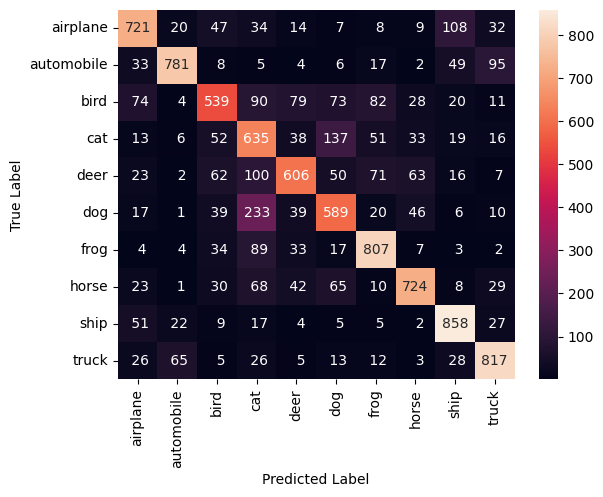

In [35]:
# create a confusion matrix
conf_matrix = confusion_matrix(y_true=test_labels, y_pred=predicted_labels)

# convert confusion matrix to a pandas dataframe
confusion_df = pd.DataFrame(data=conf_matrix, index=class_names, columns=class_names)

# set the names of the x and y axis
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

# use the heatmap function from seabord to visualize the confusion matrix
sns.heatmap(data=confusion_df, annot=True, fmt='3g')